In [12]:
import pandas as pd

# Load the transactions data
file_name= "customer_master.csv"
read_file = "/Users/ajaychandraas/Library/CloudStorage/OneDrive-IUInternationalUniversityofAppliedSciences/2nd Sem Subjects/Elective A Project BI/Data/"+file_name 
df = pd.read_csv(read_file, delimiter= ";")
df.columns

Index(['CustomerID', 'Age', 'SleepPreferences', 'NumPurchases',
       'TotalTransactionValue', 'FrequencyOfTransactions',
       'NumSupportInteractions', 'CountOfIssuesRaised',
       'TotalResolutionTimeSec', 'CountOfPromoParticipations',
       'NumProductReturns', 'CountPromoEmailsOpened', 'CountLinksClicked',
       'CountWebsiteVisits', 'Churn'],
      dtype='object')

In [13]:
selected_features = df[['Age','NumPurchases', 'TotalTransactionValue', 'FrequencyOfTransactions', 'NumSupportInteractions', 'CountOfIssuesRaised', 'TotalResolutionTimeSec', 'CountOfPromoParticipations', 'NumProductReturns', 'CountPromoEmailsOpened', 'CountLinksClicked', 'CountWebsiteVisits']]
target_variable = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        85
           1       0.96      1.00      0.98        65

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion Matrix:
[[82  3]
 [ 0 65]]
Precision: 0.9558823529411765
Recall: 1.0
F1-Score: 0.9774436090225563


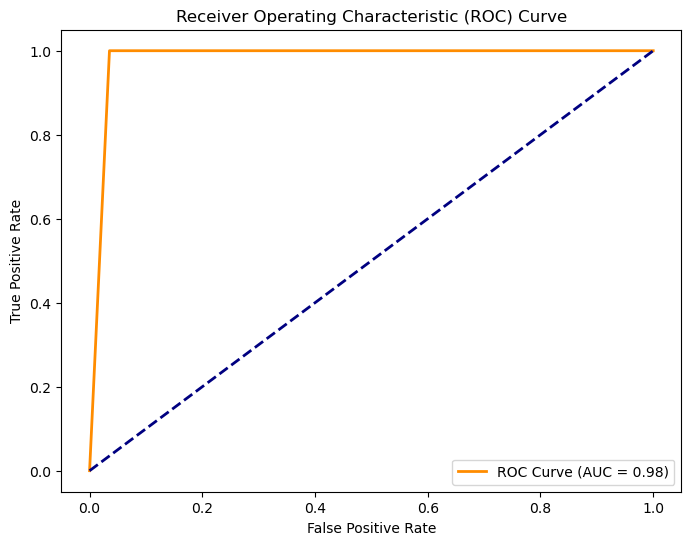

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Your existing code
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print('Classification Report:')
print(classification_report(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Additional metrics
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'F1-Score: {f1_score(y_test, predictions)}')

# Calculate ROC-AUC and plot ROC curve
roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


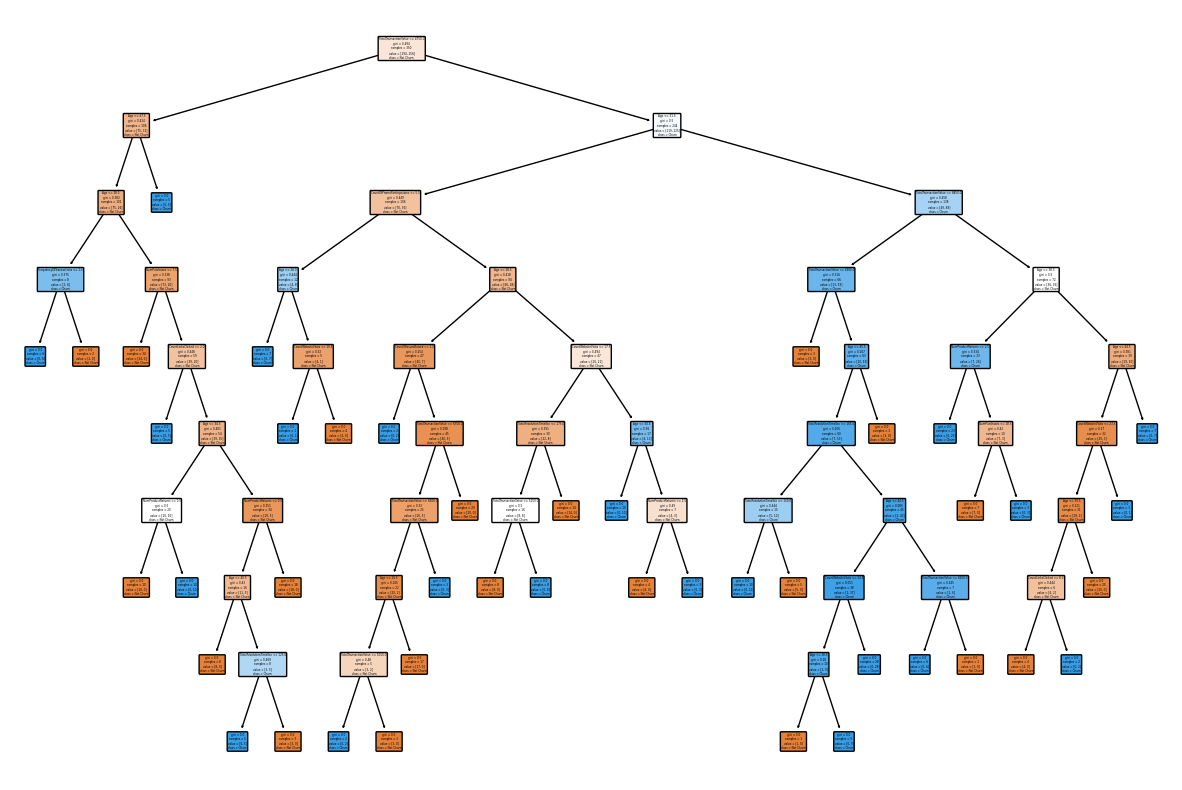

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index object to a list
feature_names_list = selected_features.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=feature_names_list, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()